# 损失函数
## 定义
损失函数用于评价网络模型输出的预测值$\hat{Y}=f(X)$与真实值$Y$之间的差异。这里使用$L(Y,\hat{Y})$表示损失函数，它是一个非负实值函数。损失值越小，网络模型越好。
<br/>
假设网络中有N个样本，样本的输入和输出向量为$(X,Y)=(x_i,y_i),i \in [1,N]$，那么总损失函数$L(Y,\hat{Y})$为每一个输出预测值与真实值的误差之和：
$$
L(Y,\hat{Y}) = \sum_{i=0}^{N} l(y_i,\hat{y_i})
$$

## 回归损失函数
### 1.均方误差损失函数
运用均方误差(Mean Squared Error Loss, MSE)的典型回归算法有线性回归（Linear Regression）
$$
loss(Y,\hat{Y}) = \frac{1}{N} \sum_{i = 1}^{N}(\hat{y_i}-y_i)^2
$$

```python
def mean_squared_error(y_true, y_pred):
    return np.mean(np.squre(y_pred - y_true), axis=-1)
```

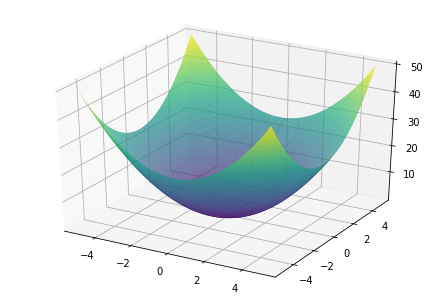

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

predict_y = np.linspace(-5, 5, 300)
real_y = np.linspace(-5, 5, 300)
predict_y, real_y = np.meshgrid(predict_y, real_y)
z = predict_y ** 2 + real_y ** 2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(predict_y, real_y, z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

### 2.平均绝对误差损失函数
平均绝对误差损失(Mean Absolute Error Loss, MAE)，是对数据的绝对误差求平均。
$$
loss(Y,\hat{Y}) = \frac{1}{N} \sum_{i=1}^{N} |\hat{y_i} - y_i|
$$

```python
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true), axis=-10
```

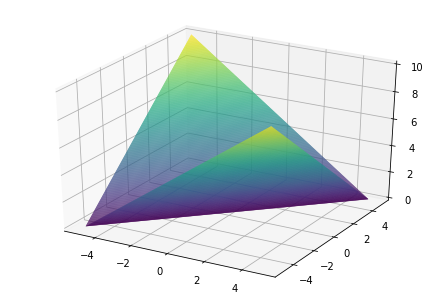

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

predict_y = np.linspace(-5, 5, 300)
real_y = np.linspace(-5, 5, 300)
predict_y, real_y = np.meshgrid(predict_y, real_y)
z = np.abs(predict_y - real_y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(predict_y, real_y, z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

### 3.均方误差对数损失函数
Mean Squared Log Error, MSLE
<br/>
$$
loss(Y,\hat{Y}) = \frac{1}{N} \sum_{i=1}{N} (log\hat{y_i} - logy_i)^2
$$

```python
def mean_sauared_logarithmic_error(y_true, y_pred):
    first_log = np.log(np.clip(y_pred, 10e-6, None) + 1.)
    second_log = np.log(np.clip(y_true, 10e-6, None) + 1.)
    return np.mean(np.square(first_log - second_log), axis=-1)
```

为防止计算$log0$没有意义，因此加入一个很小的常数$\epsilon = 10^{-6}$作为计算补偿。

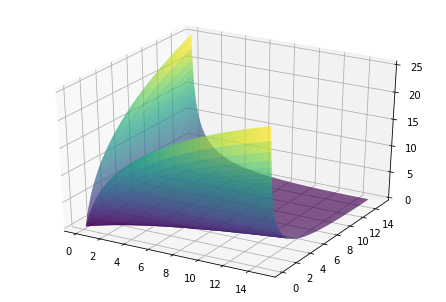

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

predict_y = np.linspace(0.1, 15, 500)
real_y = np.linspace(0.1, 15, 500)
predict_y, real_y = np.meshgrid(predict_y, real_y)
z = (np.log(predict_y)-np.log(real_y))**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(predict_y, real_y, z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

### 4.平均百分比误差损失函数
Mean Absolute Percentage Error Loss, MAPE
<br/>
$$
loss(Y,\hat{Y}) = \frac{1}{N} \sum_{i=1}^{N} \frac{100|\hat{y_i} - y_i|}{y_i}
$$

```python
def mean_absolute_percentage_error(y_true, y_pred):
    diff = np.abs((y_pred - y_true) / np.clip(np.abs(y_true), 10e-6, None))
    return 100 * np.mean(diff, axis=-1)
```

### 5.回归损失函数总结
目前均方差仍然是使用最为广泛，均方误差有着不错性能。
<br/>
MAE会比较有效地惩罚异常值，如果数据异常值较多，需要考虑使用平均绝对误差作为损失函数。一般情况下，为了不让数据出现太多异常值，可以对数据进行预处理操作。
<br/>
均方误差对数损失与均方误差的计算过程类似，多了对每个数据进行对数计算，目的是缩小函数输出的范围值。
<br/>
平均绝对百分比误差损失则计算预测值与真实值的相对误差。
<br/>
均方误差对数损失与平均绝对百分比误差损失实际上是用来处理大范围数据（如：$[-10^5, 10^5]$）的，但是在神经网络中，我们常把输入数据归一化到一个合理范围（如：$[-1,1]$）的，然后再使用均方误差或者平均绝对误差损失来计算损失。

## 分类损失函数
### 1.Logistic损失函数
在最大似然估计函数中，定义一个损失函数为$loss(Y,P(Y|X))$,公式表示样本$X$在分类$Y$的情况下，使概率$P(Y|X)$达到最大值。利用已知的样本$X$分布，找到最有可能的参数，使样本$X$属于$Y$的概率$P(Y|X)$最大。假设二分类有$P(Y=1|X) = Y, P(Y=0|X) = 1-Y$，因此对于多分类有：
$$
P(Y|X) = y_i^{y_i} \times (1-y_i)^{1-y_i}
$$

在这里使用最大似然函数，目的是使每个分类都最大化，预测其所属正确分类的概率：
$$
loss(Y,\hat{Y}) = \prod_{i=0}^{N} \hat{y_i}^{y_i} \times (1 - \hat{y_i})^{1-y_i}
$$

### 2.负对数似然损失函数
为方便计算，在处理概率乘积时通常把最大似然函数转化为概率的对数。在前面加一个负号之后，最大化概率$P(Y|X)$等价于寻求最小化的损失。最后Logistic损失函数变成了常见的负对数似然函数（Negative Log Likelihood Loss）:
$$
loss(Y,\hat{Y}) = - \sum_{i=0}^{N} \times log\hat{y_i} + (1-y_i) \times log(1-\hat{y_i})
$$

### 3.交叉熵损失函数
由于Logistic损失函数和负对数似然损失函数都只能处理二分类问题，从两个类别拓展到$M$个类别，于是有了交叉熵损失函数(Cross Entropy Loss):
$$
loss(Y,\hat{Y}) = - \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i,j} \times log (\hat{y_{i,j}})
$$

```python
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 10e-6))
```

### 4.Hinge损失函数
运用Hinge损失的典型分类器SVM算法，因为Hinge损失可以用来解决间隔最大化问题。当分类模型需要硬分类结果的，例如分类结果是0或1、-1或1的二分类数据，Hinge损失是最方便的选择。
$$
loss(Y,\hat{Y}) = \frac{1}{N} \sum_{i=1}^{N} \max(0, 1 - \hat{y_i} \times y_i)
$$

```python
def hinge(y_true, y_pred):
    return np.mena(np.maximum(1. - y_true * y_pred, 0.), axis=-1)
```

### 5.指数损失函数
使用指数（Exponential）损失函数的典型分类器是AdaBoost算法：
$$
loss(Y,\hat{Y}) = \sum_{i=1}^{N} e^{-y_i \times \hat{y_i}}
$$

```python
def exponential(y_true, y_pred):
    return np.sum(np.exp(-y_true*y_pred)
```